# Data Cleaning

In [54]:
# import neccessary libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
#train and test
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [56]:
# train head
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
train.shape[0],test.shape[0]

(891, 418)

In [58]:
train.shape[0]+test.shape[0]

1309

In [59]:
train.isnull().sum()
# There is 177 null values in the 'Age' column. And 687 null values in the "Cabin" column. The Embarked column has 2 values.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
test.isnull().sum()
# This Dataset is for prediction.

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [61]:
# The data that can be used for visualization is the train dataset
data = train
data.shape[0]

891

In [62]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
# 50 percentage of data 
x=int((50/100)*data.shape[0])
x

445

In [64]:
# percentage of missing values in each column of data
x= {column:(data[column].isnull().sum()/data.shape[0])*100 for column in data.columns}
x

{'PassengerId': np.float64(0.0),
 'Survived': np.float64(0.0),
 'Pclass': np.float64(0.0),
 'Name': np.float64(0.0),
 'Sex': np.float64(0.0),
 'Age': np.float64(19.865319865319865),
 'SibSp': np.float64(0.0),
 'Parch': np.float64(0.0),
 'Ticket': np.float64(0.0),
 'Fare': np.float64(0.0),
 'Cabin': np.float64(77.10437710437711),
 'Embarked': np.float64(0.22446689113355783)}

In [65]:
# drop columns and rows with values less than 50%
data_clean=data.dropna(axis='columns',thresh=445)
data_clean=data_clean.dropna(axis="rows",thresh=5)
data_clean.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [66]:
#correlation
data_clean.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [67]:

data_clean["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [68]:
data_clean["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [69]:
# Replace missing values
from sklearn.impute import KNNImputer
temp_data= data_clean[["Pclass","SibSp","Parch","Age"]]
imputer = KNNImputer(n_neighbors=3)
data_imputed = imputer.fit_transform(temp_data)



In [70]:
# data statistics
pd.DataFrame(data_imputed,columns=temp_data.columns).describe()

,Pclass,SibSp,Parch,Age
count,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.523008,0.381594,28.982233
std,0.836071,1.102743,0.806057,13.381341
min,1.000000,0.000000,0.000000,0.420000
25%,2.000000,0.000000,0.000000,22.000000
50%,3.000000,0.000000,0.000000,27.666667
75%,3.000000,1.000000,0.000000,36.000000
max,3.000000,8.000000,6.000000,80.000000


In [71]:
# impute missing values
data_clean["Age"]=data_imputed[:,-1]
data_clean.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [72]:
data_clean["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [73]:
# convert categorical column to numerical column
temp_dict = dict()
for idx,val in enumerate(data_clean["Embarked"].value_counts().index.to_list()):
    temp_dict[val]= idx
temp_dict

{'S': 0, 'C': 1, 'Q': 2}

In [74]:
data_clean["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [75]:
data_clean.shape


(891, 11)

In [76]:
data_clean["Embarked"]=data_clean["Embarked"].map(temp_dict)


In [77]:
data_clean.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.033119,-0.057527,-0.001652,0.012658,-0.030555
Survived,-0.005007,1.000000,-0.338481,-0.040998,-0.035322,0.081629,0.257307,0.108669
Pclass,-0.035144,-0.338481,1.000000,-0.367371,0.083081,0.018443,-0.549500,0.043835
Age,0.033119,-0.040998,-0.367371,1.000000,-0.320868,-0.206296,0.099381,-0.006074
SibSp,-0.057527,-0.035322,0.083081,-0.320868,1.000000,0.414838,0.159651,-0.060606
Parch,-0.001652,0.081629,0.018443,-0.206296,0.414838,1.000000,0.216225,-0.079320
Fare,0.012658,0.257307,-0.549500,0.099381,0.159651,0.216225,1.000000,0.063462
Embarked,-0.030555,0.108669,0.043835,-0.006074,-0.060606,-0.079320,0.063462,1.000000


In [78]:
data_clean.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [79]:
cols=data_clean.describe().columns.to_list()[1:]
temp_data=data_clean[cols]

In [80]:
cols

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [81]:
temp_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1,0,7.2500,0.0
1,1,1,38.0,1,0,71.2833,1.0
2,1,3,26.0,0,0,7.9250,0.0
3,1,1,35.0,1,0,53.1000,0.0
4,0,3,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0.0
887,1,1,19.0,0,0,30.0000,0.0
888,0,3,12.0,1,2,23.4500,0.0
889,1,1,26.0,0,0,30.0000,1.0


In [82]:
# use imputer to fill in missing values
data_imputed=imputer.fit_transform(temp_data)

In [83]:
data_clean["Embarked"]=data_imputed[:,-1]

In [84]:
# np.array(data_imputed[:,-1], dtype="int64")

In [85]:
data_clean["Embarked"]=data_clean["Embarked"].astype("int64")

In [86]:
data_clean["Embarked"].value_counts()

Embarked
0    646
1    168
2     77
Name: count, dtype: int64

In [87]:
swap_dict=dict()
for key,val in temp_dict.items():
    swap_dict[val]=key

In [88]:
swap_dict

{0: 'S', 1: 'C', 2: 'Q'}

In [89]:
data_clean["Embarked"]=data_clean["Embarked"].map(swap_dict)

In [90]:
data_clean["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [91]:
data_clean.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# EDA

In [92]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [93]:
data_clean.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033119,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.040998,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.367371,0.083081,0.018443,-0.549500
Age,0.033119,-0.040998,-0.367371,1.000000,-0.320868,-0.206296,0.099381
SibSp,-0.057527,-0.035322,0.083081,-0.320868,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.206296,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.099381,0.159651,0.216225,1.000000


In [94]:
data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [95]:
data_clean.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.982233,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.381341,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,27.666667,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [96]:
data_clean["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [97]:
data_clean.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [98]:

x=data_clean.groupby('Sex')['Survived'].mean()['female']
y=data_clean.groupby('Sex')['Survived'].mean()['male']
print(f"About  {round(x*4)} in 4 females survived. while {round(y*4)} in 4 men only survived.")

About  3 in 4 females survived. while 1 in 4 men only survived.


In [99]:
data_clean.groupby("Sex")["Survived"].value_counts().unstack()

Survived,0,1
Sex,,
female,81,233
male,468,109


In [100]:
data_clean.groupby("Survived")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,29.414997,12.978227,1.00,22.0,27.666667,35.0,74.0
1,342.0,28.287534,13.995576,0.42,21.0,27.666667,36.0,80.0


The mean survival age is 27 with youngest survivor being 4 months old and oldest being 80 years old. the variability is 13.9 which is slightly higher than of non-survivors.
The mean age of non survivors is 27 with the youngest one being 1 year old and oldest being 74. The variability is slightly lower than that of survivors that is 12.97.

In [101]:
# The youngest Survivor
x=data_clean[data_clean["Survived"]==1]["Age"].min()
data_clean[data_clean["Age"]==x]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,C


In [102]:
# The oldest Survivor
x=data_clean[data_clean["Survived"]==1]["Age"].max()
data_clean[data_clean["Age"]==x]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,S


In [103]:
data_clean.groupby(["Survived","Sex"])["Age"].describe()

count       mean        std   min   25%        50%   75%  \
Survived Sex                                                                
0        female   81.0  23.670782  13.161628  2.00  14.0  24.000000  30.0   
         male    468.0  30.409188  12.698826  1.00  23.0  27.666667  36.0   
1        female  233.0  28.905579  13.274289  0.75  22.0  27.666667  36.0   
         male    109.0  26.966391  15.406392  0.42  19.0  27.666667  35.0   

                  max  
Survived Sex           
0        female  57.0  
         male    74.0  
1        female  63.0  
         male    80.0

In [104]:
data_clean.groupby("Pclass")["Survived"].value_counts().unstack()

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [105]:
data_clean.groupby(["Pclass","Sex"])["Survived"].value_counts().unstack()

Survived         0   1
Pclass Sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

In [114]:
data_clean.groupby(["Pclass","Sex"])["Survived"].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [116]:
# 1st class
x=data_clean.groupby(["Pclass","Sex"])["Survived"].mean()[1,"female"]
y=data_clean.groupby(["Pclass","Sex"])["Survived"].mean()[1,"male"]
print(f"About  {(x*4)} in 4 females survived. while {(y*4)} in 4 men only survived.")

About  3.872340425531915 in 4 females survived. while 1.4754098360655739 in 4 men only survived.


In [117]:
# 2nd class
x=data_clean.groupby(["Pclass","Sex"])["Survived"].mean()[2,"female"]
y=data_clean.groupby(["Pclass","Sex"])["Survived"].mean()[2,"male"]
print(f"About  {(x*4)} in 4 females survived. while {(y*4)} in 4 men only survived.")

About  3.6842105263157894 in 4 females survived. while 0.6296296296296297 in 4 men only survived.


In [118]:
# 3rd class
x=data_clean.groupby(["Pclass","Sex"])["Survived"].mean()[3,"female"]
y=data_clean.groupby(["Pclass","Sex"])["Survived"].mean()[3,"male"]
print(f"About  {(x*4)} in 4 females survived. while {(y*4)} in 4 men only survived.")

About  2.0 in 4 females survived. while 0.5417867435158501 in 4 men only survived.


In [472]:
data_clean.groupby(['Sex', 'Pclass'])['Survived'].aggregate('mean').unstack()

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [473]:
data_clean.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [474]:
age = pd.cut(data_clean['Age'], [0, 18, 80])
data_clean.pivot_table('Survived', ['Sex', age], 'Pclass',observed=False)

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.450980
       (18, 80]  0.975904  0.903226  0.526882
male   (0, 18]   0.800000  0.600000  0.220339
       (18, 80]  0.350427  0.086022  0.118056

In [475]:
fare = pd.qcut(data_clean['Fare'], 2)
data_clean.pivot_table('Survived', ['Sex', age], [fare, 'Pclass'], observed=False)

Fare            (-0.001, 14.454]                     (14.454, 512.329]  \
Pclass                         1         2         3                 1   
Sex    Age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.884615  0.533333          0.975904   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.118644  0.106122          0.369369   

Fare                                 
Pclass                  2         3  
Sex    Age                           
female (0, 18]   1.000000  0.266667  
       (18, 80]  0.916667  0.515152  
male   (0, 18]   0.818182  0.194444  
       (18, 80]  0.029412  0.186047

In [476]:
fare.unique()

[(-0.001, 14.454], (14.454, 512.329]]
Categories (2, interval[float64, right]): [(-0.001, 14.454] < (14.454, 512.329]]

In [477]:
data_clean.pivot_table(index='Sex', columns='Pclass',
aggfunc={'Survived':"sum", 'Fare':'mean'})

Fare                       Survived        
Pclass           1          2          3        1   2   3
Sex                                                      
female  106.125798  21.970121  16.118810       91  70  72
male     67.226127  19.741782  12.661633       45  17  47

In [478]:
data_clean.pivot_table('Survived', index='Sex', columns='Pclass', margins=True)

Pclass,1,2,3,All
Sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [516]:
#data_clean.to_csv("data_clean.csv", index=False)

# Visualization

In [479]:
%matplotlib inline

In [480]:
data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

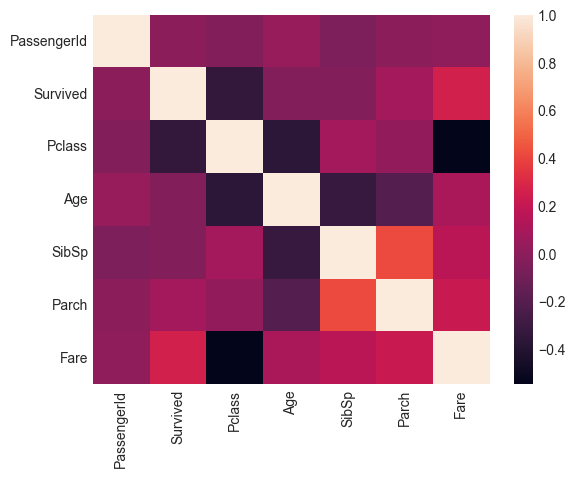

In [481]:
sns.heatmap(data_clean.corr(numeric_only=True))

C:\Users\anagh\AppData\Local\Temp\ipykernel_6488\795823072.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z = data_clean["Sex"].replace({"male":0,"female":1})
C:\Users\anagh\AppData\Local\Temp\ipykernel_6488\795823072.py:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z=data_clean[data_clean["Survived"]==1]["Sex"].replace({"male":0,"female":1})


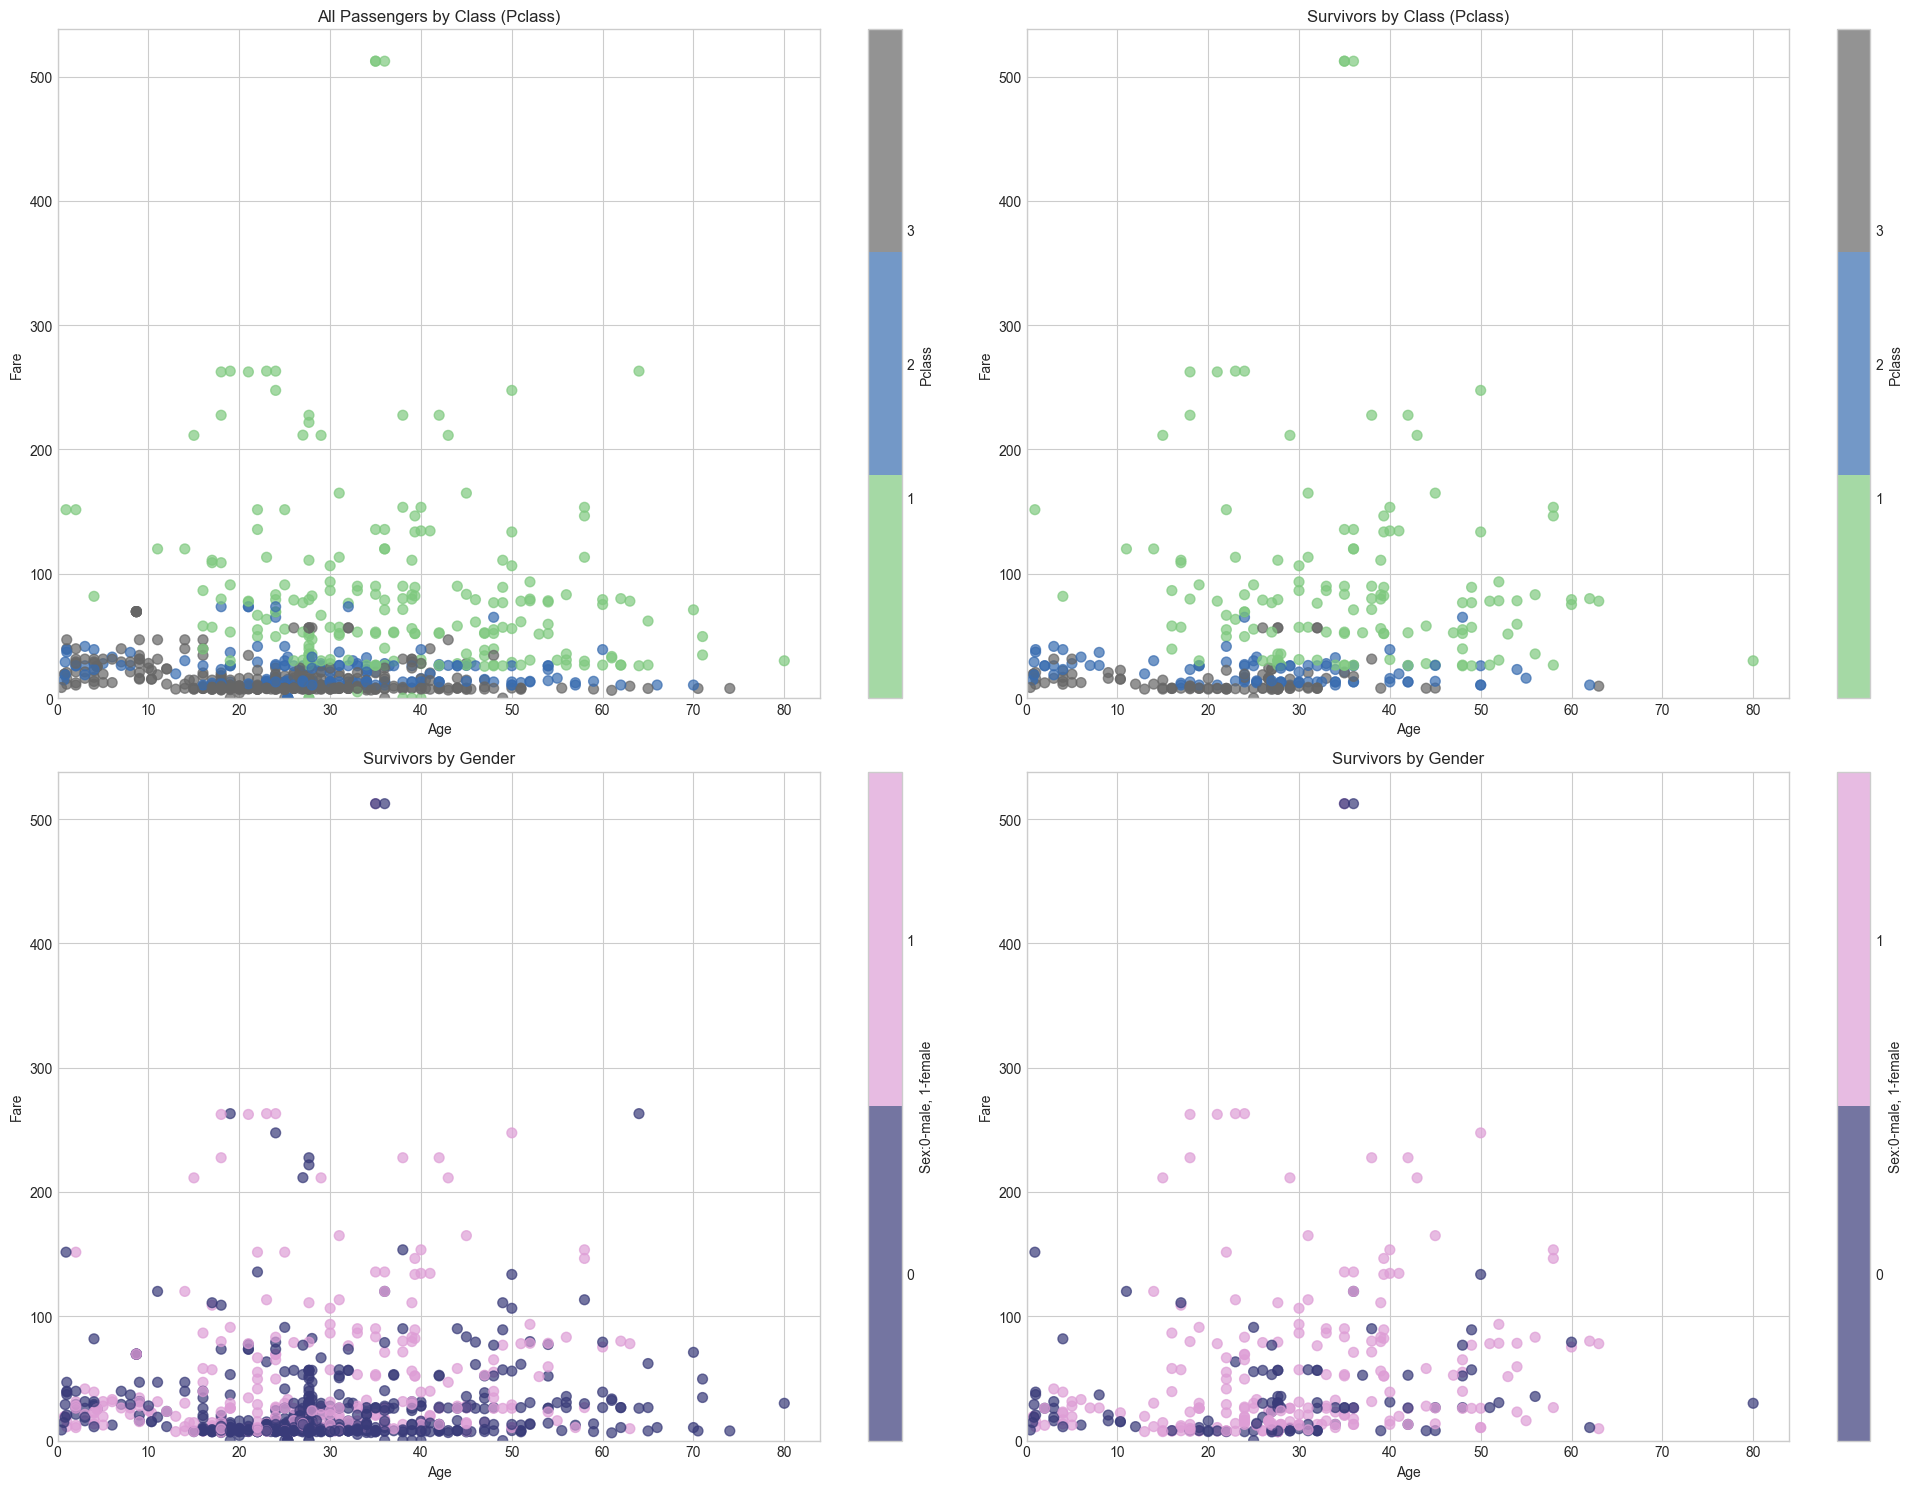

In [482]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)

#PLOT 1
x = data_clean["Age"]
y = data_clean["Fare"]
z = data_clean["Pclass"]
plt.xlabel("Age")
plt.ylabel("Fare")
plt.scatter(x,y,c=z,s=50, cmap=plt.get_cmap('Accent', 3),alpha=0.7)
plt.title("All Passengers by Class (Pclass)")
plt.clim(-0.5, 4.5)
plt.ylim(0)
plt.xlim(0)
plt.colorbar(ticks=[1,2,3], label='Pclass')

#PLOT 2
plt.subplot(2,2,2)
x=data_clean[data_clean["Survived"]==1]["Age"]
y=data_clean[data_clean["Survived"]==1]["Fare"]
z=data_clean[data_clean["Survived"]==1]["Pclass"]
plt.xlabel("Age")
plt.ylabel("Fare")
plt.scatter(x,y,c=z,s=50,cmap=plt.get_cmap('Accent', 3),alpha=0.7)
plt.title("Survivors by Class (Pclass)")
plt.clim(-0.5, 4.5)
plt.ylim(0)
plt.xlim(0)
plt.colorbar(ticks=[1,2,3], label='Pclass')


#PLOT3
plt.subplot(2,2,3)
x = data_clean["Age"]
y = data_clean["Fare"]
z = data_clean["Sex"].replace({"male":0,"female":1})
plt.xlabel("Age")
plt.ylabel("Fare")
plt.scatter(x,y,c=z,s=50,cmap=plt.get_cmap('tab20b', 2),alpha=0.7)
plt.title("Survivors by Gender")
plt.clim(-0.5, 1.5)
plt.ylim(0)
plt.xlim(0)
plt.colorbar(ticks=[0 , 1], label='Sex:0-male, 1-female')

#PLOT 4
plt.subplot(2,2,4)
x=data_clean[data_clean["Survived"]==1]["Age"]
y=data_clean[data_clean["Survived"]==1]["Fare"]
z=data_clean[data_clean["Survived"]==1]["Sex"].replace({"male":0,"female":1})
plt.title("Survivors by Gender")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.scatter(x,y,c=z,s=50,cmap=plt.get_cmap('tab20b', 2),alpha=0.7)
plt.clim(-0.5,1.5)
plt.ylim(0)
plt.xlim(0)
plt.colorbar(ticks=[0 , 1], label='Sex:0-male, 1-female')

plt.tight_layout()

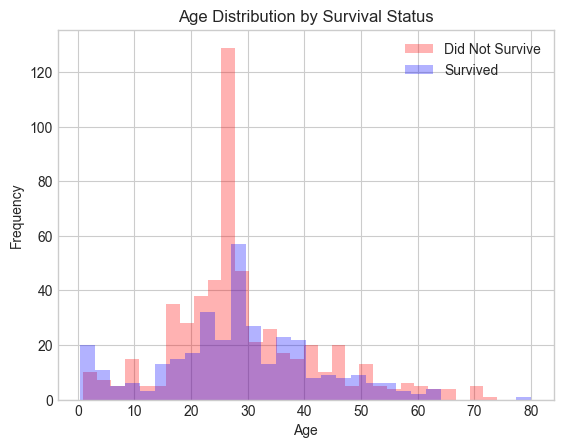

In [ ]:

x = data_clean[data_clean["Survived"] == 0]["Age"]
y = data_clean[data_clean["Survived"] == 1]["Age"]
kwargs = dict(histtype="stepfilled", alpha=0.3, bins=30)
plt.hist(x, color='red', label='Did Not Survive',**kwargs)
plt.hist(y, color='blue', label='Survived', **kwargs)
# Add legend and labels for better visualization
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution by Survival Status")
plt.legend()
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

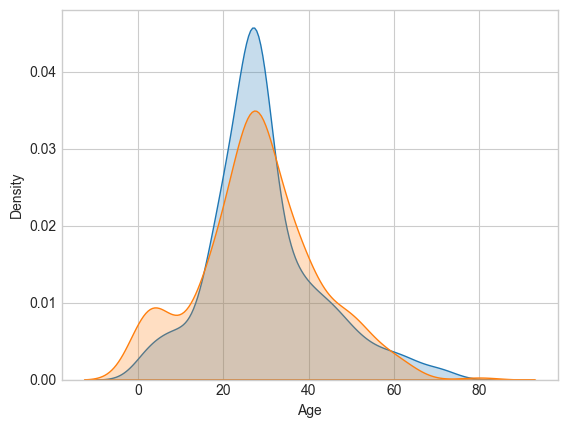

In [519]:
x = data_clean[data_clean["Survived"] == 0]["Age"]
y = data_clean[data_clean["Survived"] == 1]["Age"]
sns.kdeplot(x,fill=True)
sns.kdeplot(y,fill=True)

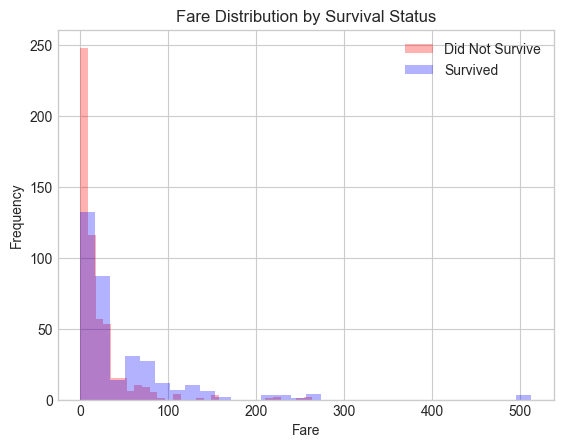

In [484]:
x = data_clean[data_clean["Survived"] == 0]["Fare"]
y = data_clean[data_clean["Survived"] == 1]["Fare"]

kwargs = dict(histtype="stepfilled", alpha=0.3, bins=30)

plt.hist(x, color='red', label='Did Not Survive', **kwargs)
plt.hist(y, color='blue', label='Survived', **kwargs)

# Add legend and labels for better visualization
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Fare Distribution by Survival Status")
plt.legend()

plt.show()

# Modelling

In [485]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

(array([  1.,  11.,  41., 165., 277., 281., 165.,  48.,   9.,   2.]),
 array([-3.92193086, -3.14203047, -2.36213008, -1.58222968, -0.80232929,
        -0.02242889,  0.7574715 ,  1.53737189,  2.31727229,  3.09717268,
         3.87707307]),
 <BarContainer object of 10 artists>)

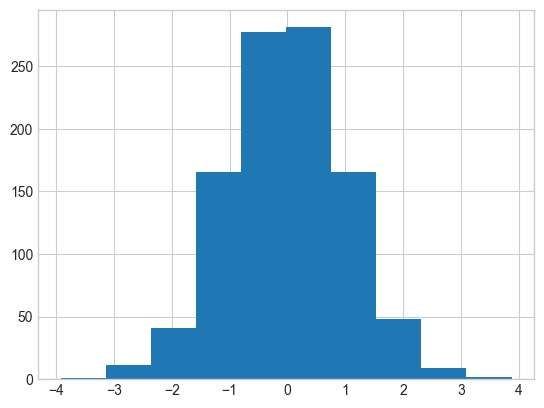

In [486]:
data = np.random.randn(1000)
plt.hist(data)

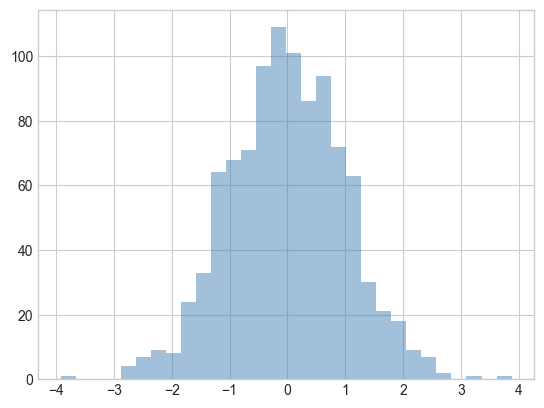

In [487]:
plt.hist(data, bins=30,alpha=0.5,
histtype='stepfilled', color='steelblue',
edgecolor='none');

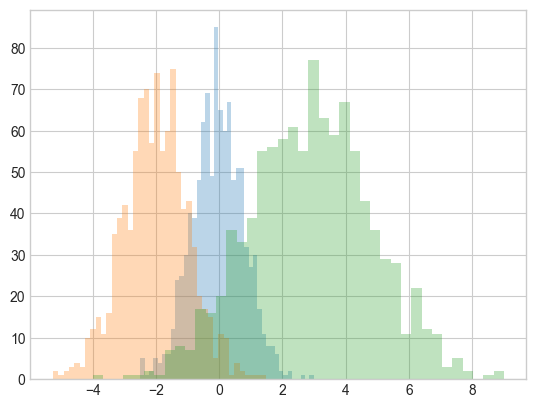

In [488]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

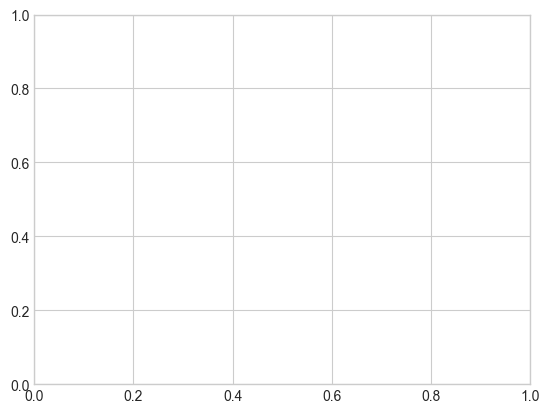

In [489]:
plt.style.use('seaborn-v0_8-whitegrid')
fig=plt.figure()
ax=plt.axes()

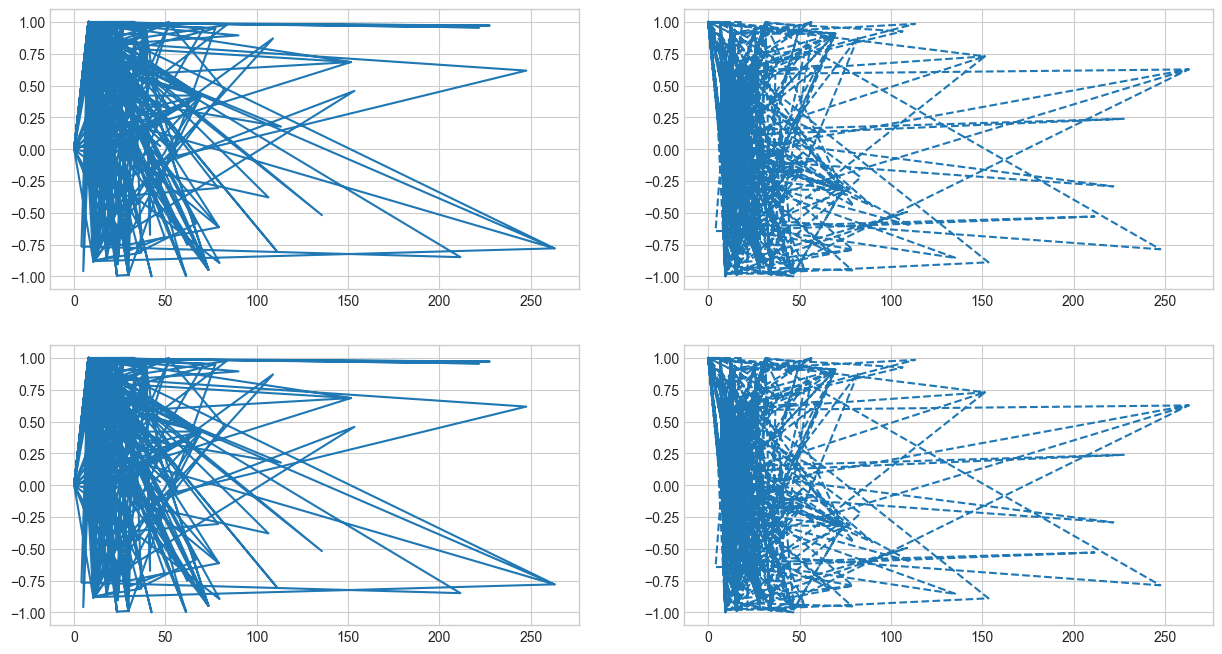

In [490]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=[15,8])
ax[0,0].plot(x,np.sin(x),'-')
ax[0,1].plot(x,np.cos(x),'--')
ax[1,0].plot(x,np.sin(x),'-')
ax[1,1].plot(x,np.cos(x),'--')

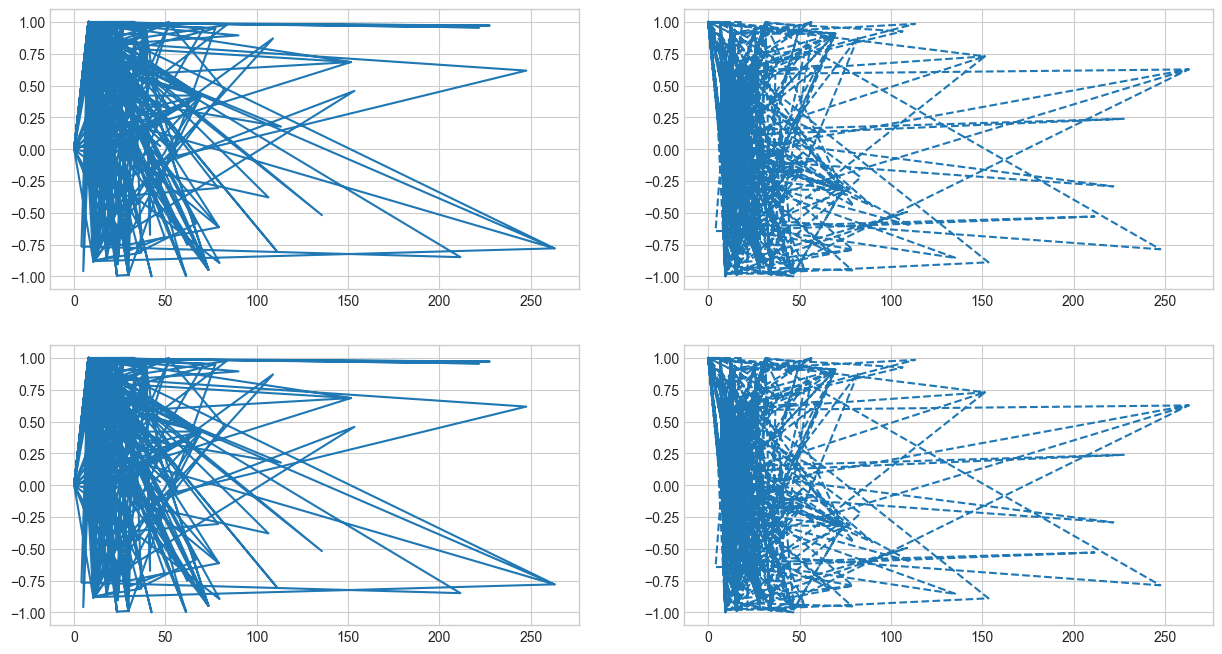

In [491]:
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2,figsize=[15,8])
ax1.plot(x,np.sin(x),'-')
ax2.plot(x,np.cos(x),'--')
ax3.plot(x,np.sin(x),'-')
ax4.plot(x,np.cos(x),'--')

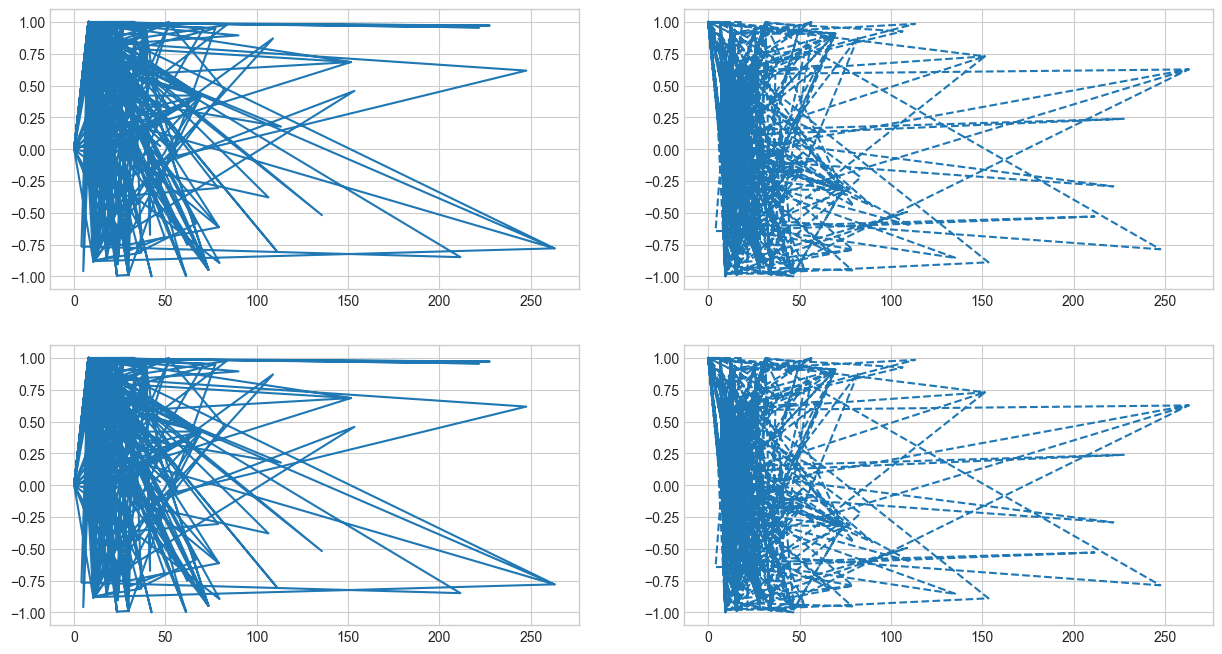

In [492]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=[15,8])
ax = ax.flatten()
ax[0].plot(x,np.sin(x),'-')
ax[1].plot(x,np.cos(x),'--')
ax[2].plot(x,np.sin(x),'-')
ax[3].plot(x,np.cos(x),'--')

In [493]:

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


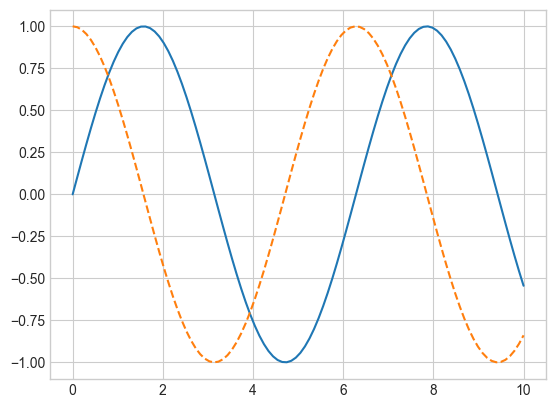

In [494]:
x=np.linspace(0,10,100)
fig=plt.figure()
plt.plot(x,np.sin(x),'-')
plt.plot(x,np.cos(x),'--')

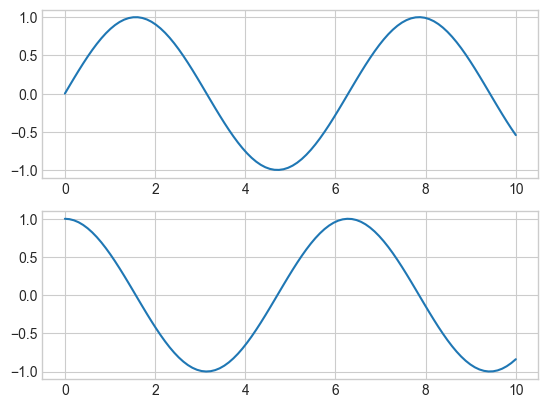

In [495]:
fig=plt.figure()
plt.subplot(2,1,1)
plt.plot(x,np.sin(x))
plt.subplot(2,1,2)
plt.plot(x,np.cos(x));

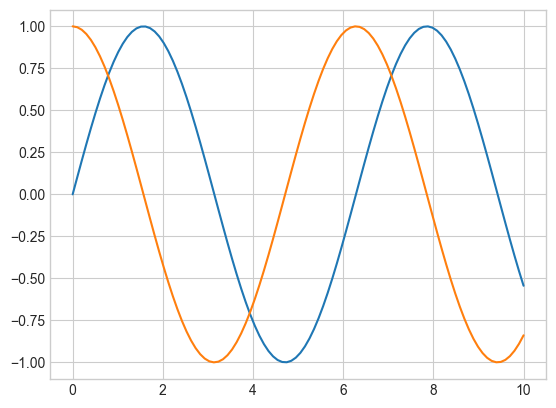

In [496]:
fig=plt.figure()
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x));

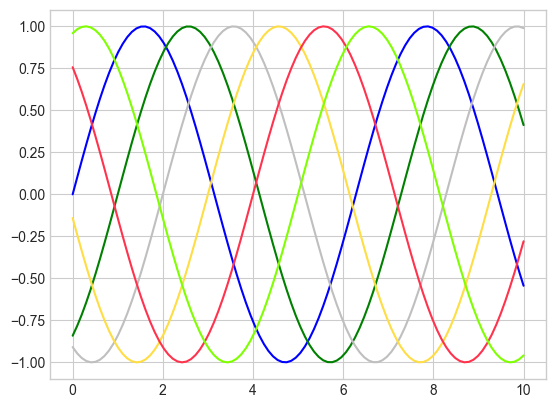

In [497]:
plt.plot(x, np.sin(x - 0), color='blue') # specify color by name
plt.plot(x, np.sin(x - 1), color='g') # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75') # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44') # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 and 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

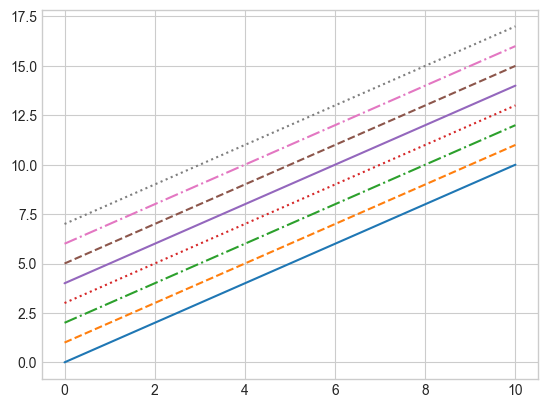

In [498]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');
# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-') # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':'); # dotted

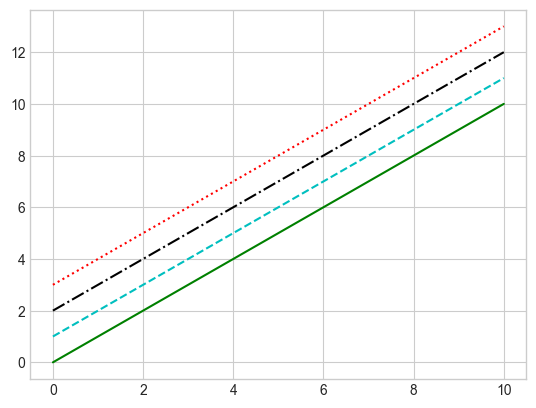

In [499]:
plt.plot(x, x + 0, '-g') # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r'); # dotted red

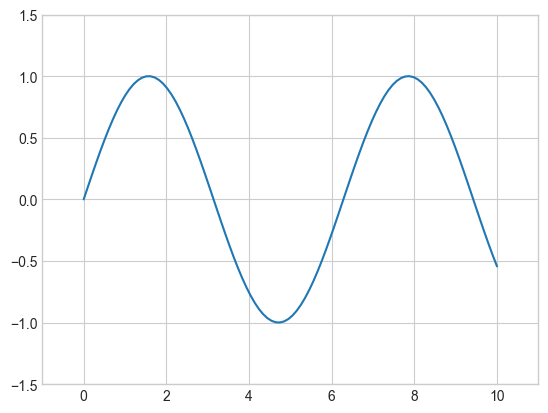

In [500]:
plt.plot(x, np.sin(x))
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

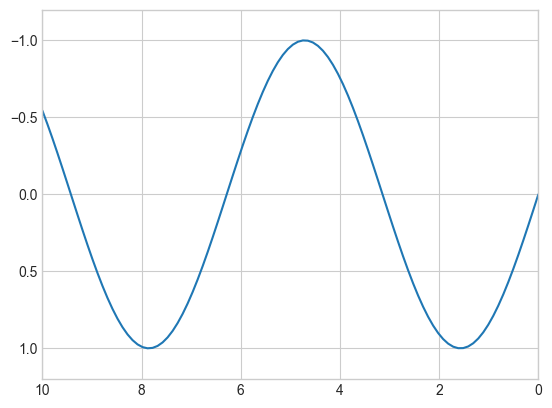

In [501]:
plt.plot(x, np.sin(x))
plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

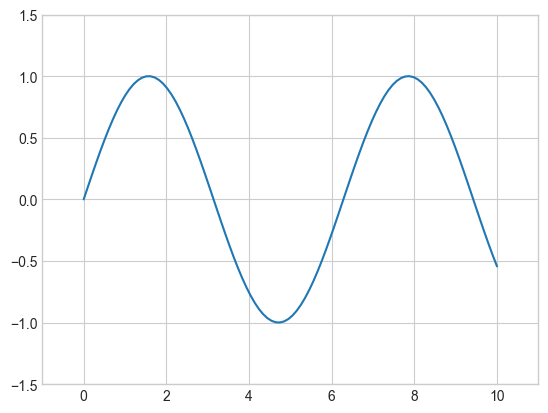

In [502]:
# [xmin, xmax, ymin,ymax]
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

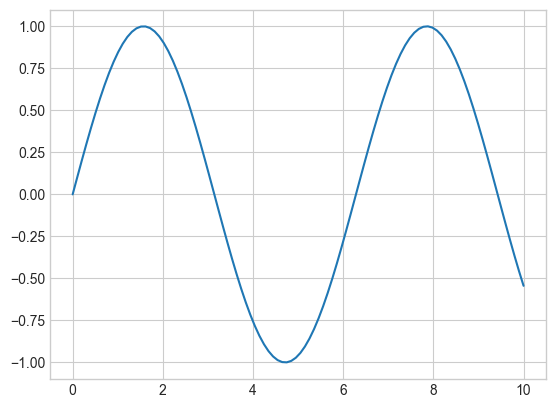

In [503]:
plt.plot(x, np.sin(x))
plt.axis('tight');

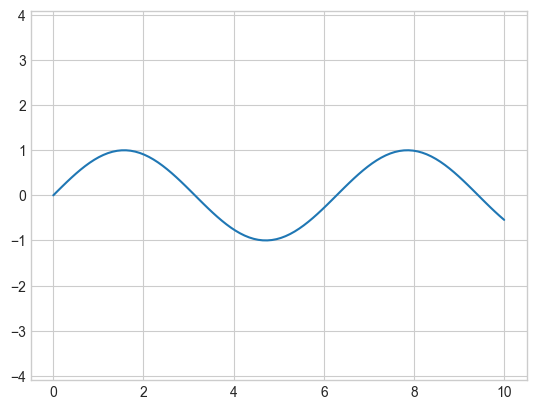

In [504]:
plt.plot(x, np.sin(x))
plt.axis('equal');

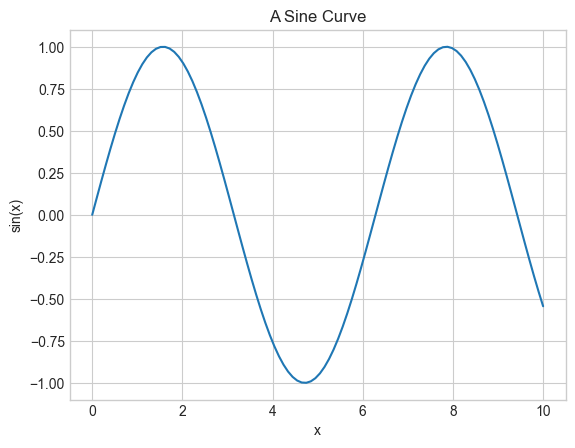

In [505]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

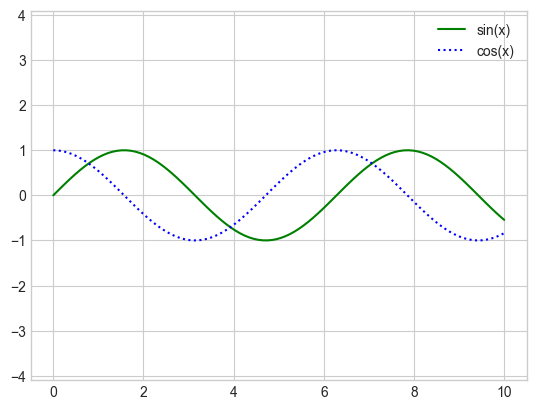

In [506]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')
plt.legend();

• plt.xlabel() → ax.set_xlabel()
• plt.ylabel() → ax.set_ylabel()
• plt.xlim() → ax.set_xlim()
• plt.ylim() → ax.set_ylim()
• plt.title() → ax.set_title()

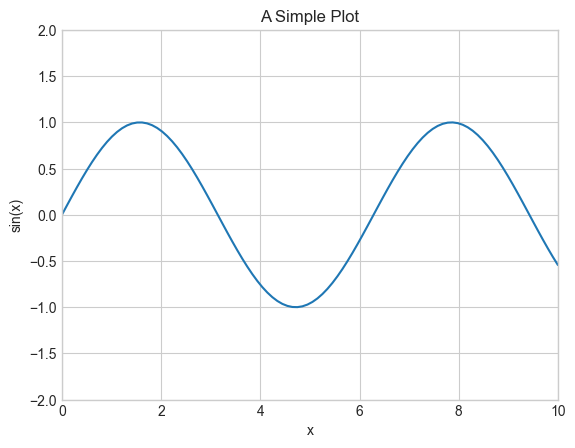

In [507]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
xlabel='x', ylabel='sin(x)',
title='A Simple Plot');

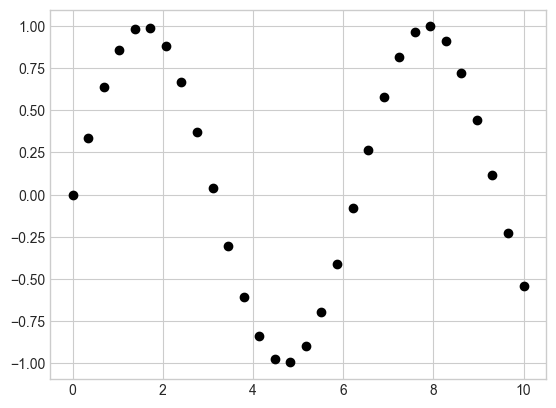

In [508]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, 'o', color='black');

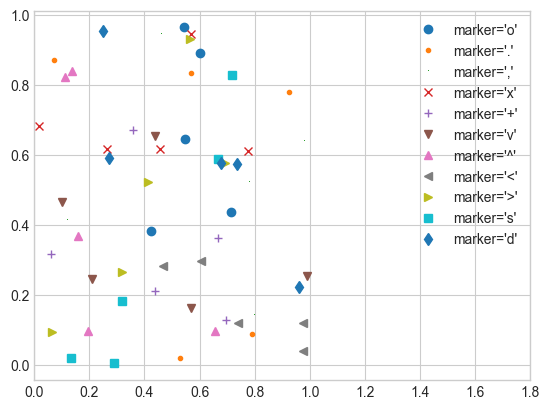

In [509]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
 plt.plot(rng.rand(5), rng.rand(5), marker,
 label="marker='{0}'".format(marker))
 plt.legend(numpoints=1)
 plt.xlim(0, 1.8);

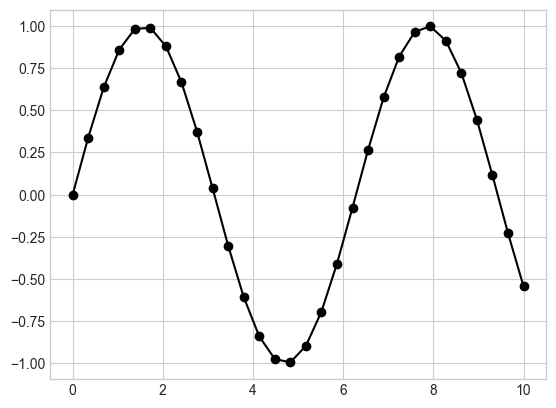

In [510]:
plt.plot(x, y, '-ok'); # line (-), circle marker (o), black (k)

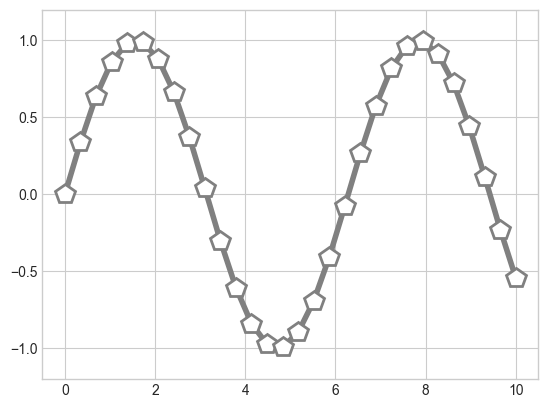

In [511]:
plt.plot(x, y, '-p', color='gray',
markersize=15, linewidth=4,
markerfacecolor='white',
markeredgecolor='gray',
markeredgewidth=2)
plt.ylim(-1.2, 1.2);

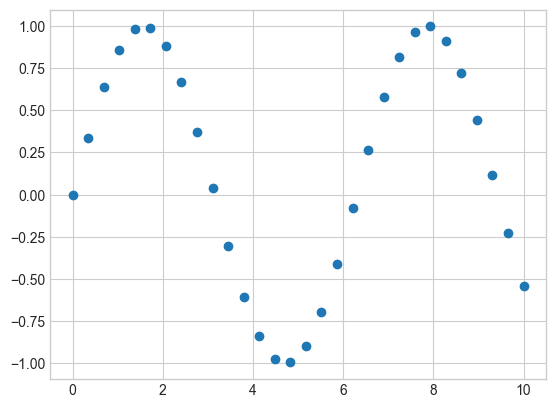

In [512]:
plt.scatter(x, y, marker='o');

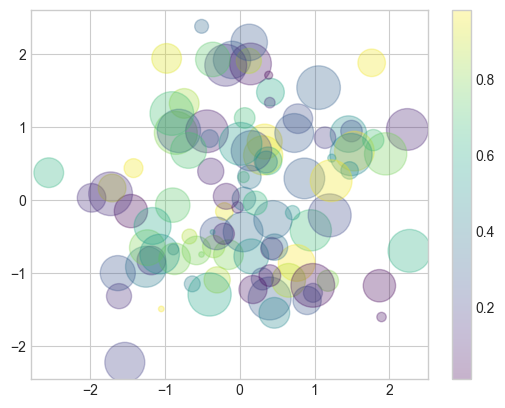

In [513]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
cmap='viridis')
plt.colorbar(); # show color scale

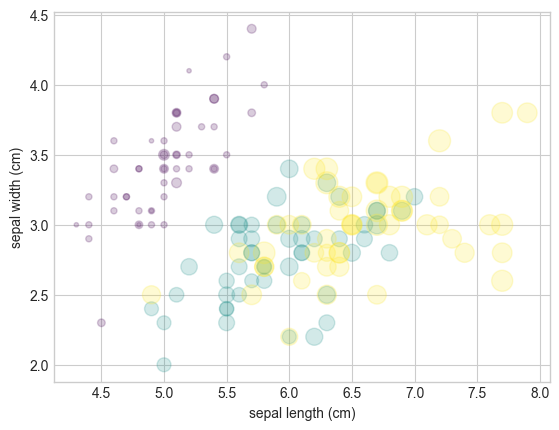

In [514]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T
plt.scatter(features[0], features[1], alpha=0.2,
s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

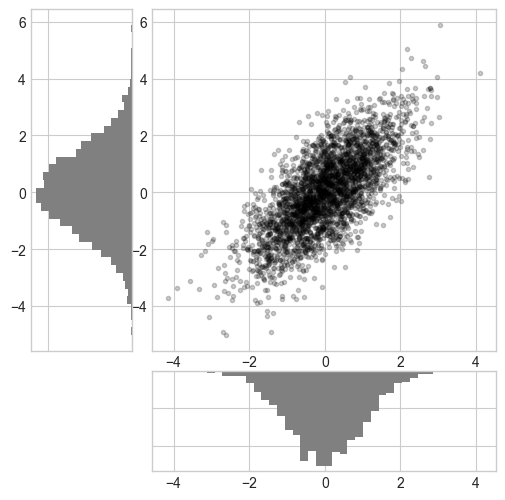

In [515]:
#Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)
# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
orientation='vertical', color='gray')
x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype='stepfilled',
orientation='horizontal', color='gray')
y_hist.invert_xaxis()